In [7]:
# Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
from numpy import sin, cos, pi, arctan2, exp
import numpy as np
import matplotlib.pyplot as plt
from Kildekode._03_Sinussignal import *
import scipy.signal as sig

plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

%matplotlib ipympl

<img src="Figurer/NTNU_Logo.png" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# AC-spenning og Impedans

* **Emne AIS1004 - Industriell Elektroteknikk**
* **Uke 7, 2024**
* **Underviser: Kai Erik Hoff**

# Tema
* Egenskaper til sinussignal
    - Amplitude
    - Frekvens
    - Fase og tidsforskyvning
* AC-spenning og reaktive komponenter
* Viseranalyse

## Repetisjon sinusbølger - *den ideelle formen på AC-spenning*
* Rene bølgeformer - regnes som å kun inneholde én frekvens.
* Kan beskrives matematisk med funksjonsuttrykket
$$x(t) = A\cdot \cos\left(\omega\cdot t + \phi \right)$$
    - $A$ er bølgens *Amplitude*
    - $\omega$ er bølgens *Vinkelfrekvens* (rad/s:)
        - Relasjon til frekvens $f$(Hz): $\ \ \omega = 2\pi \cdot f$
    - $\phi$ er bølgens *fase*

<img src="Figurer/03_Sinussignal/Fig2_sinusbølge.png" width="80%" />


## Python-demo: *sinusbølge* 
$$x(t) = A\cdot \cos(2\pi \cdot f \cdot t + \phi )$$

Output()

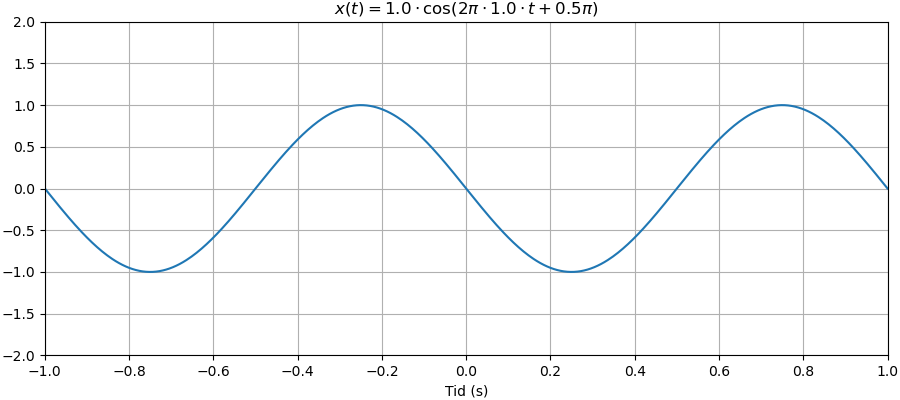

In [2]:
SineWaveDemo(1, fig_size=(9,4));

## Regneeksempel 1:
Figuren nedenfor viser en sinusbølge.

<img src="Figurer/03_Sinussignal/Fig3_sinusbølge.png" width="90%" />

1. Finn amplitude, frekvens og fase for sinusbølgen, og skriv uttrykket på formen $x(t) = A\cdot \cos\left( 2\pi\cdot f\cdot t + \phi \right)$.

2. Representer sinusbølgen på viserform 


## Periodisitet
* Sinusbølger er periodiske. 
    * Det vil si at dersom du tidsforskyver et signal med et heltalls antall perioder, så vil du få samme signal:
$$ x(t-T) = x(t)$$
     _der $T$ er signalperioden._
*  Faseleddet til en sinusbølge vil ***alltid*** kunne omregnes til intervallet $-\pi \leq \phi \leq \pi$.

$$\cos(x) = \cos(x + k \cdot 2\pi), \ \ \ k\in \mathbb{Z}$$

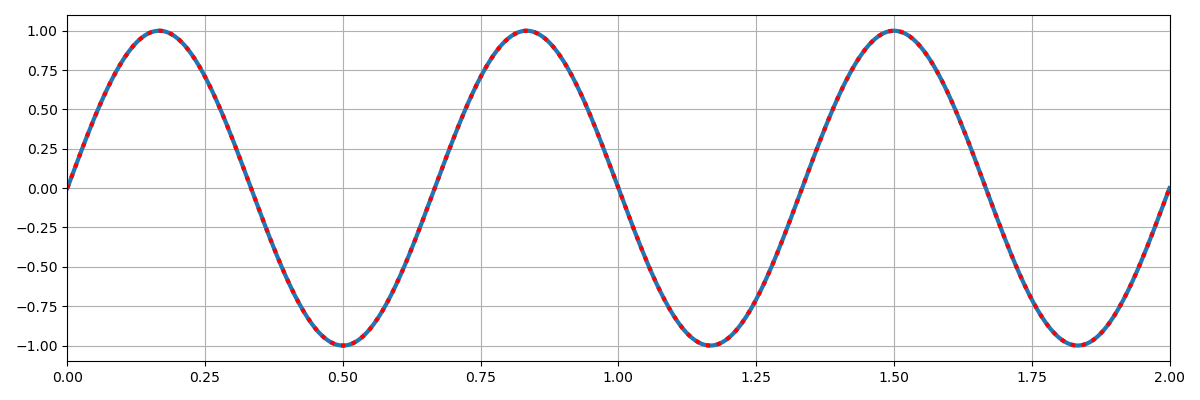

In [4]:
t = np.linspace(0, 2, 501)
x_t= sin(2*pi*1.5*t)
y_t= sin(2*pi*1.5*t + 2*pi)

plt.close(2);plt.figure(2, figsize=(12,4))
plt.plot(t, x_t, linewidth=3)
plt.plot(t, y_t, 'r:', linewidth=3)
plt.grid(True)

## Noen andre egenskaper
* Ekvivalens:
$$\sin\left(x\right) = \cos\left(x - \frac{\pi}{2}\right)$$
* Cosinus er en like funksjon:
$$\cos\left(-x\right) = \cos\left(x\right)$$
* Sinus er en odde funksjon:
$$-\sin\left(-x\right) = \sin\left(x\right)$$
* Derivasjon:
$$\frac{d \sin(x)}{dx} = \cos(x) = \sin(x + 90^{\circ})$$

<img src="Figurer/03_Sinussignal/Fig4_sinVcos.png" width="100%" />


# Viser-representasjon

* For en gitt frekvens $\omega$ kan vi beskrive bølgeformen fullstendig med amplitude $A$ og fasevinkel $\phi$.
* Utgjør en ***kompleks amplitude***: $\boldsymbol{A} = A\cdot e^{j\cdot \phi}$ (alternativt $A \angle \phi)$

Output()

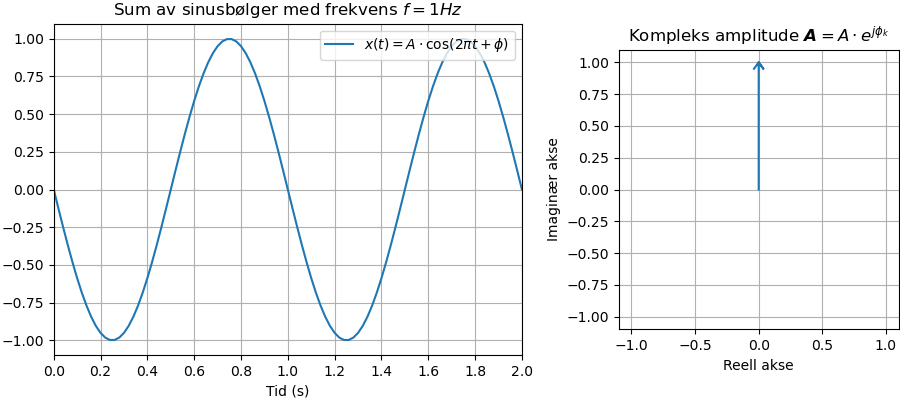

In [3]:
PhasorDemo(fig_num=2);

# Sinusspenning og kondensator

<img src="Figurer/07_RLC/CapAC.png" width="50%" />

* Hva blir forholdet mellom $\frac{\boldsymbol{V}_s}{\boldsymbol{I}}$?

* Viseren $\boldsymbol{V}_s = 1$ 
    * amplitude $A=1$V, og vi antar nesten alltid at kildesignalet er referanse for fase ($\phi=0$)
* Finn strømmen $i(t)$:

$$\begin{align}
i(t) &= C \cdot \frac{d v_s(t)}{dt} \\
&= C \cdot \frac{d \sin(\omega\cdot t)}{dt}\\
&= C \cdot \omega \cdot \cos(\omega \cdot t) \\
&= C \cdot \omega \cdot \sin(\omega \cdot t + 90^{\circ})
\end{align}$$

* Finn viseren for strømmen:
$$\begin{align}
\boldsymbol{I}&=A_I\cdot e^{j\cdot\phi_I} \\
&= C \cdot \omega \cdot e^{j\cdot 90^{\circ}} \\
&= j\cdot \omega \cdot C
\end{align}$$

* Forhold mellom strøm og spenning:
$$\frac{\boldsymbol{V}_s}{\boldsymbol{I}} = \frac{1}{j\cdot \omega \cdot C}$$

# Sinusspenning og Spole

<img src="Figurer/07_RLC/IndAC.png" width="50%" />

* Hva blir forholdet mellom $\frac{\boldsymbol{V}_s}{\boldsymbol{I}}$?

* Viseren $\boldsymbol{V}_s = 1$ 
    * amplitude $A=1$V, og vi antar nesten alltid at kildesignalet er referanse for fase ($\phi=0$)
* Finn strømmen $i(t)$:

$$\begin{align}
i(t) &= \frac{1}{L} \cdot \int v_s(t) dt \\
&= \frac{1}{L} \cdot \int \sin(\omega\cdot t) dt \\
&= \frac{1}{L} \cdot \frac{1}{\omega} \cdot \left(-\cos(\omega \cdot t) \right)\\
&= \frac{1}{L\cdot \omega} \sin(\omega \cdot t - 90^{\circ})
\end{align}$$

* Finn viseren for strømmen:
$$\begin{align}
\boldsymbol{I}&=A_I\cdot e^{j\cdot\phi_I} \\
&= \frac{1}{L\cdot \omega} \cdot \omega \cdot e^{-j\cdot 90^{\circ}} \\
&= -j\cdot \frac{1}{L\cdot \omega}
\end{align}$$

* Forhold mellom strøm og spenning:
$$\frac{\boldsymbol{V}_s}{\boldsymbol{I}} = \frac{1}{-j\cdot \frac{1}{L\cdot \omega}} = j\cdot \omega \cdot L$$

# Kompleks resistans (aka. Impedans)

|Komponent|Impedans
|---|---|
|Motstand|$$\boldsymbol{Z}=R$$|
|Spole|$$\boldsymbol{Z} = j\omega \cdot L$$|
|Kondensator | $$\boldsymbol{Z} = \frac{1}{j\omega\cdot C} = \frac{-j}{\omega\cdot C}$$|

## Generell Ohms Lov:

# $$\boldsymbol{V} = \boldsymbol{Z}\cdot \boldsymbol{I}$$

# Impedans

* Kompleks relasjon mellom *visere* for strøm og spenning i en krets

$$\boldsymbol{Z} = \frac{\boldsymbol{V}}{\boldsymbol{I}}$$

Total impedans i  en krets finnes ved å legge sammen inpedansen til individuelle komponenter

<img src="Figurer/08_Filterkretser/Impedans.png" width="80%" />

## Regneeksempel 1:
<img src="Figurer/07_RLC/RL2.png" width="40%" />

$$v_s(t) = 2\sin(50\cdot t), \ \ \ R = 10\Omega, \ \ \ L = 0.2H$$

* Finn den totale impedansen ***Z***, strømmen ***I*** og spolespenningen $\boldsymbol{V}_L$

Text(0, 0.5, 'Spenning $v_C(t)$')

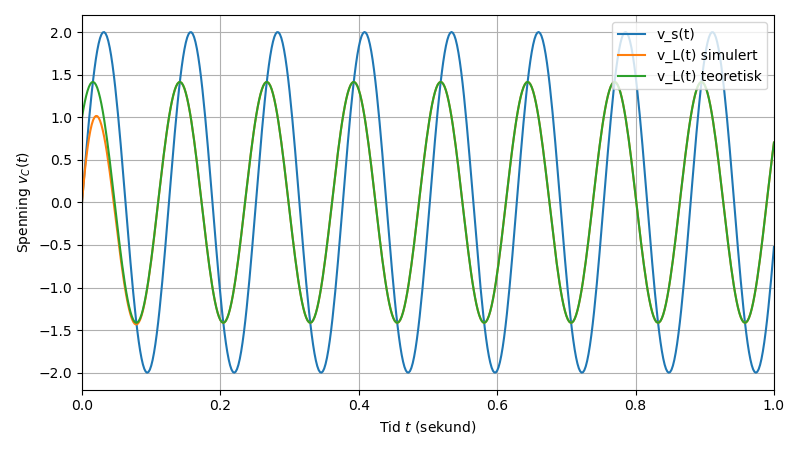

In [21]:
# Parametre spenningskilde
w = 50
A = 2
phi = 0 # grader

# Komponentverdier Krets
R = 10
L = 0.2

# Utregning
V = A*np.exp(1j*np.deg2rad(phi)) # Viser spenning v_s(t)
Z_R = R
Z_L = 1j*w*L
I = V/(Z_R + Z_L)
V_L = I*Z_L
v_L = np.abs(V_L)*np.sin(w*t + np.angle(V_L))


# Simulering
t = np.linspace(0, 1, 501)
v_t = A*np.sin(w*t)
RL_circ = sig.TransferFunction([1, 0], [1, R/L]) # Forklares senere
_, v_L_sim, _= RL_circ.output(v_t, t) # v_C(t) når v_0(t) = 1V

plt.figure()
plt.plot(t, v_t, label=r"v_s(t)")
plt.plot(t, v_L_sim, label=r"v_L(t) simulert")
plt.plot(t, v_L, label=r"v_L(t) teoretisk")
plt.legend(loc="upper right")
plt.xlabel("Tid $t$ (sekund)")
plt.ylabel("Spenning $v_C(t)$")

## Regneeksempel 2:

<img src="Figurer/07_RLC/RLC2.png" width="50%" />

$$v_s(t) = 2\sin(50\cdot t), \ \ \ R = 10\Omega, \ \ \ L = 0.2H, \ \ \ C=2mF$$

Finn uttrykket for $v_C(t)$

Text(0, 0.5, 'Spenning $v_C(t)$')

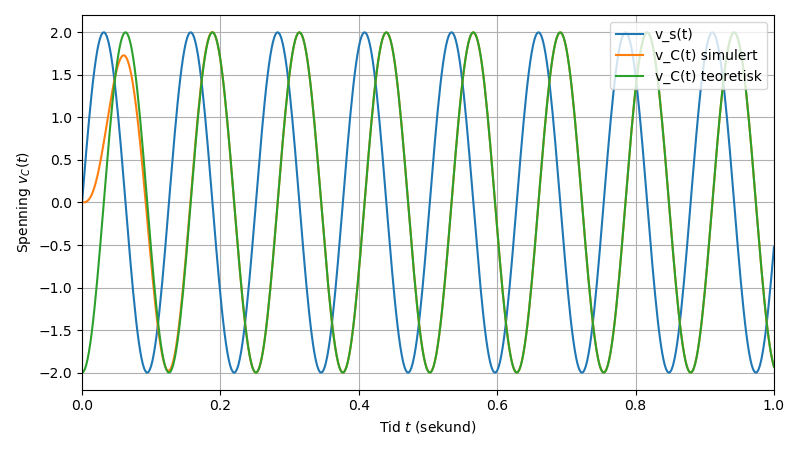

In [22]:
# Parametre spenningskilde
w = 50
A = 2
phi = 0 # grader

# Komponentverdier Krets
R = 10   # Ohm
L = 0.2  # Henry
C = 2e-3 # Farad

# Utregning
V = A*np.exp(1j*np.deg2rad(phi)) # Viser spenning v_s(t)
Z_R = R
Z_L = 1j*w*L
Z_C = 1/(1j*w*C)
Z = Z_R + Z_L + Z_C
I = V/Z
V_C = I*Z_C
v_C = np.abs(V_C)*np.sin(w*t + np.angle(V_C))


# Simulering
t = np.linspace(0, 1, 501)
v_t = A*np.sin(w*t)
RLC_circ = sig.TransferFunction([1/(L*C)], [1, R/L, 1/(L*C)]) # Forklares senere
_, v_C_sim, _= RLC_circ.output(v_t, t) # v_C(t) når v_0(t) = 1V

plt.figure()
plt.plot(t, v_t, label=r"v_s(t)")
plt.plot(t, v_C_sim, label=r"v_C(t) simulert")
plt.plot(t, v_C, label=r"v_C(t) teoretisk")
plt.legend(loc="upper right")
plt.xlabel("Tid $t$ (sekund)")
plt.ylabel("Spenning $v_C(t)$")

<img src="Figurer/08_Filterkretser/PhasorDiagram.png" width="75%" />

## Rep: Impedans i motstander

<img src="Figurer/08_Filterkretser/Motstand.png" width="50%" />

## Rep: Impedans i spoler

<img src="Figurer/08_Filterkretser/Spole.png" width="50%" />

## Rep: Impedans i Kondensatorer

<img src="Figurer/08_Filterkretser/Kondensator.png" width="50%" />

## Quiz: viserdiagram

<img src="Figurer/08_Filterkretser/Quiz1.png" width="80%" />

## Eksempel: tegn viserdiagram for denne kretsen

<img src="Figurer/07_RLC/Phasor_ex_1.png" width="80%" />

# Frekvensrespons

* En *frekvensavhengig formel for spenningsdeling*

<img src="Figurer/07_RLC/VoltageDiv.png" width="50%" />

$$H(j\omega) = \frac{\boldsymbol{V}_{ut}(j\omega)}{\boldsymbol{V}_{inn}(j\omega)} = \frac{\boldsymbol{Z}_{2}(j\omega)}{\boldsymbol{Z}_{1}(j\omega)+\boldsymbol{Z}_{2}(j\omega)}$$

# Visualisering av frekvensrespons (bode-plot)

Text(0, 0.5, 'Gain $|H(j\\omega)|$')

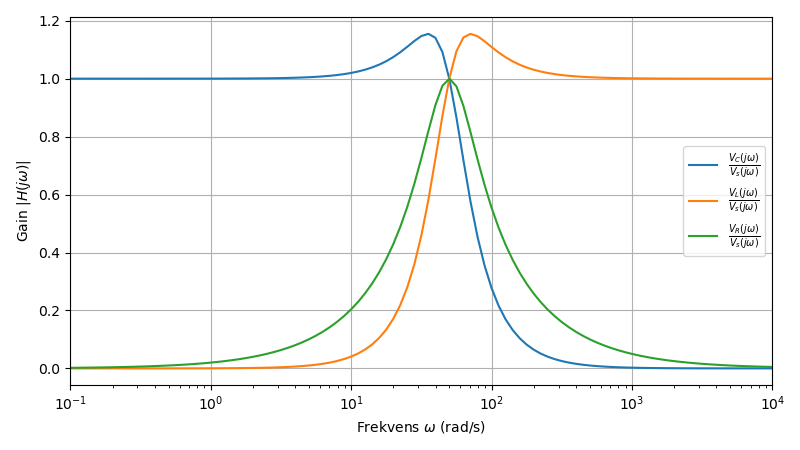

In [5]:
R = 10
L = 0.2
C = 2e-3

w = np.logspace(-1, 4, 101)

Zr = R+0j
Zl = 1j*w*L
Zc = 1/(1j*w*C)

HwC = Zc/(Zr+Zl+Zc) # Kondensatorspenning
HwL = Zl/(Zr+Zl+Zc) # Spolespenning
HwR = Zr/(Zr+Zl+Zc) # Spolespenning

plt.figure();
plt.semilogx(w, np.abs(HwC), label=r'$\frac{V_C(j\omega)}{V_s(j\omega)}$')
plt.semilogx(w, np.abs(HwL), label=r'$\frac{V_L(j\omega)}{V_s(j\omega)}$')
plt.semilogx(w, np.abs(HwR), label=r'$\frac{V_R(j\omega)}{V_s(j\omega)}$')
plt.legend()        
plt.xlabel(r'Frekvens $\omega$ (rad/s)')
plt.ylabel(r'Gain $|H(j\omega)|$')

# Laplacetransformasjon og Transferfunksjon

* Sinusbølger kan uttrykkes vha. komplekse eksponentialer:

$$\cos(\omega\cdot t) = \mathcal{R}\left(e^{s\cdot t}\right)\big|_{s=0+j\omega}$$


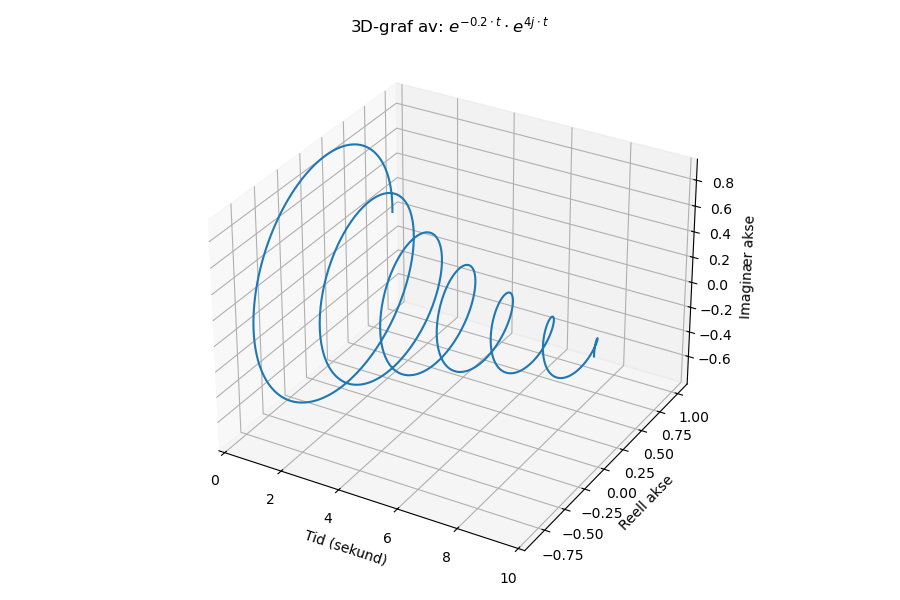

In [6]:
# Angi punkt på s-planet,
s = -0.2 + 4j
# Regn ut e^(-st),
showOscillation(s, T=10, fig_num=4)

In [7]:
plt.gca().view_init(90,90,180) # Se på reell projeksjon

* En transferfunksjon $H(s)$ er en *generell form* for frekvensrepsons $H(j\omega)$
    * Frekvensrespons $H(j\omega)$ forteller hvordan en krets påvirker et sinusformet spenningssignal: <br> $v(t) = \cos(\omega \dot t)$
        * Sinussignal er realiserbare
    * Transferfunksjon $H(s)$ fordeller hvordan kretsen (i teorien) påvirker en kompleks eksponential: <br> $v(t) = e^{s\cdot t}$
        * Komplekse eksponential er stort sett ikke realiserbare
        * Allikevel relevant for en rekke analyseteknikker